# Reducción de dimensiones. PCA y FA.

# Introducción

En este documento exploramos algunas posibilidades de python para el análisis de reducción de la dimensionalidad del conjunto de datos tanto por Análisis de Componentes Principales (PCA) como por Análisis Factorial (FA). 

Aplicaremos el estudio a los datos "cities.csv" que contiene información sobre características de 21 ciudades en cuanto a indicadores de desarrollo tecnológico, poblaciones, superficie.. Se pretende extraer las componentes o factores que puedan resumir el comportamiento de los datos en baja dimensionalidad con un fin interpretativo. 

Exploramos en particular 3 librerías de python para el ajuste o visualización del PCA: 

1. **PCA de sklearn**. Nos permite ajustar un PCA a los datos e implementa la posibilidad de escoger el número de componentes deseado o el % de variabilidad explicada de la solución propuesta. La visualización no es tan buena. Referencia: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
2. **psynlig**. Librería con muchas posibilidades en cuanto a visualización de los resultados de un PCA ajustado con sklearn. Gráficos variados e informativos. Referencia: https://psynlig.readthedocs.io/en/latest/
3. **pca**. Librería que implementa algunas opciones muy interesantes y un automatismo que facilita la interpretación de resultados. Por debajo está utilizando PCA de sklearn. Referencia: https://erdogant.github.io/pca/pages/html/index.html

Para el ajuste del FA recurrimos a dos librerías: 

1. **FactorAnalysis de sklearn**. 
2. **factor_analyzer**. Librería que resulta útil para el cálculo de los tests o criterios de adecuación muestral a priori y para el ajuste de FA por minimización de residuos o máxima verosimilitud. Basado en el paquete psych de R. 

El esquema de trabajo será: 

1. Lectura de datos
2. Evaluación de la adecuación muestral
3. Ajuste de un PCA y evaluación del número de componentes a retener. Screeplot, Kaiser y variabilidad explicada. 
4. Visualizaciones varias del PCA. 
5. Ajuste de un FA con el número de factores previamente seleccionado. 
6. Comparativa PCA vs. FA sin rotación vs. FA con rotación. 

In [3]:
!pip install factor_analyzer

     ---------------------------------------- 0.0/42.8 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.8 kB 217.9 kB/s eta 0:00:01
     ------------------ ------------------- 20.5/42.8 kB 217.9 kB/s eta 0:00:01
     -------------------------------------- 42.8/42.8 kB 260.7 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42715 sha256=fe66e6da5cc360b73914d37cbdabd076de27e8759f640ad520d81fe6c30a0d80
  Stored in directory: c:\users\usuario\appdata\local\pip\cache\wheels\a2\af\06\f4d4ed4d9d714fda437fb1583629417319603c2266e7b233cc
Successfully built factor_analyzer


In [5]:
# Importar librerías
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px

# PCA
from sklearn.preprocessing import StandardScaler, scale
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

# Factor Analysis
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# Encoding
from sklearn.preprocessing import LabelEncoder

In [7]:
# Lectura de datos
cities = pd.read_csv(r'C:\Users\Usuario\Documents\CIENCIA DE DATOS\REPOSITORIO GITHUB\MINERÍA DE DATOS Y MODELACIÓN ejercicios\4. Ejercicio base datos cities\script_base_cities_pca_fa\cities.csv')

# Fijamos nombres como index de filas
cities.set_index(['City'],inplace=True)
cities

,Area,Pop 1980,Pop 1990,Pop 2000,Growth,Food,PersRoom,Water,Elec,Phones,Vehicles
City,,,,,,,,,,,
Buenos Aires,700.000000,9918,11448,12822,1.4,40,1.3,80,91,14,1000
Dhaka,100.000000,3290,6578,11511,7.2,63,2.4,60,85,2,600
Rio de Janeiro,650.000000,8789,10948,12162,2.2,26,0.8,86,98,8,4000
Sao Paolo,800.000000,12101,18119,22552,4.1,50,0.8,100,100,16,4000
Beijing,1680.000000,9029,10867,14366,1.9,52,1.2,88,90,2,308
Shanghai,630.000000,11739,13447,17407,1.4,55,2.0,95,95,4,148
Tianjin,400.000000,7268,9249,12508,2.4,52,1.3,80,84,4,200
Cairo,21.400000,6852,8633,10761,2.3,47,1.5,91,98,4,939
Bombay,60.000000,8067,12223,18142,4.2,57,4.2,92,78,5,588


# Adecuación muestral 

Antes de realizar cualquier tipo de análisis de reducción de dimensiones, es conveniente estudiar la adecuación muestral de los datos en cuanto a la estructura de correlación global de las variables. La idea fundamental es que si no existe una estructura de varianzas compartidas entre las variables, las direcciones en el espacio entre las mismas serán más bien ortogonales y, por tanto, no hay componente en el mundo que pueda situarse correctamente para captar información de varias variables... El PCA o el FA están abocados al fracaso. 

1. **Matriz de correlaciones entre las variables**. Nos interesa siempre bien de color o, lo que es lo mismo, valores de correlación altos ya que eso es síntoma de estructura de varianzas compartidas y nos viene bien para captar esa varianza común con una buena componente situada correctamente. 


In [9]:
corr = cities.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)

,Area,Pop 1980,Pop 1990,Pop 2000,Growth,Food,PersRoom,Water,Elec,Phones,Vehicles
Area,1.000,0.178,0.148,0.081,-0.311,-0.228,-0.517,0.294,0.279,0.139,0.412
Pop 1980,0.178,1.000,0.956,0.792,-0.694,-0.521,-0.566,0.621,0.481,0.673,0.418
Pop 1990,0.148,0.956,1.000,0.923,-0.489,-0.408,-0.461,0.600,0.434,0.587,0.419
Pop 2000,0.081,0.792,0.923,1.000,-0.172,-0.139,-0.188,0.455,0.233,0.367,0.243
Growth,-0.311,-0.694,-0.489,-0.172,1.000,0.561,0.671,-0.559,-0.473,-0.540,-0.321
Food,-0.228,-0.521,-0.408,-0.139,0.561,1.000,0.602,-0.505,-0.621,-0.843,-0.761
PersRoom,-0.517,-0.566,-0.461,-0.188,0.671,0.602,1.000,-0.664,-0.793,-0.593,-0.554
Water,0.294,0.621,0.600,0.455,-0.559,-0.505,-0.664,1.000,0.830,0.551,0.416
Elec,0.279,0.481,0.434,0.233,-0.473,-0.621,-0.793,0.830,1.000,0.518,0.502
Phones,0.139,0.673,0.587,0.367,-0.540,-0.843,-0.593,0.551,0.518,1.000,0.630


2. **Test de esferidad de Bartlett**. Compara la matriz de correlaciones con una matriz identidad para extraer un p-valor. La hipótesis nula del contraste es H0: Matriz de correlaciones = Matriz identidad, por lo que nos interesa rechazarla! Recordemos que una matriz identidad tiene componentes absolutamente ortogonales, osea 0 correlación o varianza compartida. 



In [11]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
calculate_bartlett_sphericity(cities)

(260.58638573423514, 1.7307379123159782e-28)

Valor del estadístico muy alto y p-valor muy pequeño --> Rechazo claro de la hipótesis nula, tiene buena pinta!

3. **KMO-MSA global y por variable**. Índice de adecuación muestral o de Kaiser-Meyer-Olkin para comparar la correlación observada entre pares de variables y sus correspondientes correlaciones parciales (una vez eliminado el efecto de otras variables presentes). Buscamos valores superiores a 0.5 y cuanto más cercanos a 1, mejor. 


In [13]:
from factor_analyzer.factor_analyzer import calculate_kmo
print(calculate_kmo(cities))

calculate_kmo(cities.drop(['Area'], axis=1))

(array([0.37839405, 0.73406257, 0.65472742, 0.54972228, 0.63108988,
       0.66495328, 0.64841109, 0.65746689, 0.58741765, 0.64646754,
       0.72185201]), 0.6382823021918904)


(array([0.72527449, 0.72625267, 0.65315796, 0.57245851, 0.65766469,
        0.71652626, 0.63588764, 0.57609255, 0.66483853, 0.6960587 ]),
 0.6621572547528664)

La variable Area tiene un msa muy bajo por lo que nos planteamos si eliminarla del análisis para ganar estructura compartida. 


# Escalado de datos

Unidades de medida distintas implican necesidad de escalar los datos para que las variables con mayor escala de medida no "pesen" más de lo que deben en la solución. 


In [15]:
scaler = StandardScaler()
scaler.fit(cities)
X = scaler.transform(cities)
#X
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10
0,0.618192,0.185518,-0.033158,-0.419676,-0.811998,-0.078963,-0.568831,-0.134175,0.111714,0.023741,-0.478712
1,-0.657997,-1.414550,-1.218855,-0.739158,2.462882,1.446603,0.242280,-1.308202,-0.373663,-0.724109,-0.682594
2,0.511843,-0.087034,-0.154893,-0.580514,-0.360291,-1.007568,-0.937518,0.218034,0.677987,-0.350184,1.050408
3,0.830890,0.712517,1.591027,1.951466,0.712515,0.584326,-0.937518,1.039853,0.839779,0.148383,1.050408
4,2.702633,-0.029096,-0.174614,-0.043412,-0.529681,0.716984,-0.642568,0.335436,0.030818,-0.724109,-0.831428
5,0.469303,0.625127,0.453537,0.697661,-0.811998,0.915971,-0.052670,0.746346,0.435298,-0.599467,-0.912981
6,-0.019902,-0.454220,-0.568548,-0.496196,-0.247364,0.716984,-0.568831,-0.134175,-0.454559,-0.599467,-0.886477
7,-0.825177,-0.554646,-0.718525,-0.921929,-0.303827,0.385340,-0.421356,0.511541,0.677987,-0.599467,-0.509804
8,-0.743076,-0.261333,0.155531,0.876776,0.768978,1.048629,1.569552,0.570242,-0.939937,-0.537146,-0.688711
9,-0.594187,-0.028854,-0.205291,-0.455499,-0.586144,1.247616,0.684704,-1.836514,-2.153379,-0.724109,-0.733565


# Análisis de Componentes Principales (PCA)

Recurrimos a la función PCA de sklearn para obtener la descomposición en valores singulares y el resultado de componentes para los datos. 


In [17]:
pca = PCA() #n_components=0.95
scores = pca.fit_transform(X)
pd.DataFrame(scores)

,0,1,2,3,4,5,6,7,8,9,10
0,0.374405,-0.547295,0.625486,-0.305785,0.884903,-0.061483,0.271058,0.222891,-0.023458,-0.013726,0.089373
1,-3.410661,-0.301877,-0.061765,0.240458,-1.350055,-0.710143,1.131066,-0.260714,-0.145820,-0.194241,-0.075560
2,1.069987,-1.520236,0.056280,0.219424,-0.178410,-0.591955,-0.513279,0.255615,0.402279,-0.086050,0.010367
3,2.213816,1.377854,1.191234,1.055377,-1.523350,-0.460444,0.216733,-0.484879,-0.018497,0.124847,0.121076
4,0.144974,-0.743459,2.791207,0.645791,0.698063,0.593145,0.397671,0.306665,-0.005923,-0.032850,0.000780
5,0.495090,0.970056,1.652020,-0.751908,0.261812,0.216962,-0.236624,0.084487,-0.260448,0.078165,-0.103136
6,-1.060796,-0.352499,0.817114,-0.642441,0.521682,-0.258866,0.326509,-0.345374,0.364436,0.106988,-0.074539
7,-0.623249,-0.850112,0.293282,-1.598337,-0.345408,-0.333894,-0.253810,-0.251052,0.049687,0.025063,-0.023671
8,-1.518988,1.868306,0.096638,-0.090480,-0.616781,0.940905,-0.499152,-0.437983,0.110669,0.065170,-0.026731
9,-2.454763,0.942389,-0.127141,0.297442,2.091247,-0.638426,-0.128445,-0.469312,-0.053741,-0.007184,0.074395


**Visualización con paquete *psynlig***



In [21]:
pip install psynlig

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   -------------------- ------------------- 0.9/1.7 MB 27.4 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 21.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/455.9 kB ? eta -:--:--
   --------------------------------------- 455.9/455.9 kB 29.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   --------- ------------------------------ 1.8/7.7 MB 56.5 MB/s eta 0:00:01
   ------------------- -------------------- 3.7/7.7 MB 46.7 MB/s eta 0:00:01
   ------------------------------ --------- 5.8/7.7 MB 46.3 MB/s eta 0:00:01
   ---------------------------------------  7.5/7.7 MB 40.0 MB/s eta 0:00:01
   ---------------------------------------  7.6/7.7 MB 40.6 MB/s eta 0:00:01
   ---------------------------------------- 7.7/7.7 MB 30.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/121.1 kB ? eta -:--:--
   ---------------------

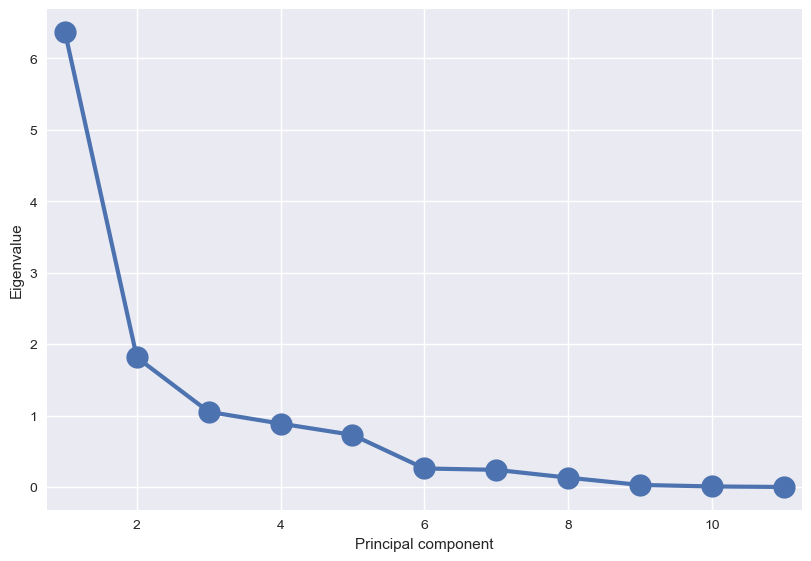

In [23]:
from psynlig import pca_scree
plt.style.use('seaborn-v0_8')

pca_scree(pca, marker='o', markersize=16, lw=3)

plt.show()

In [27]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


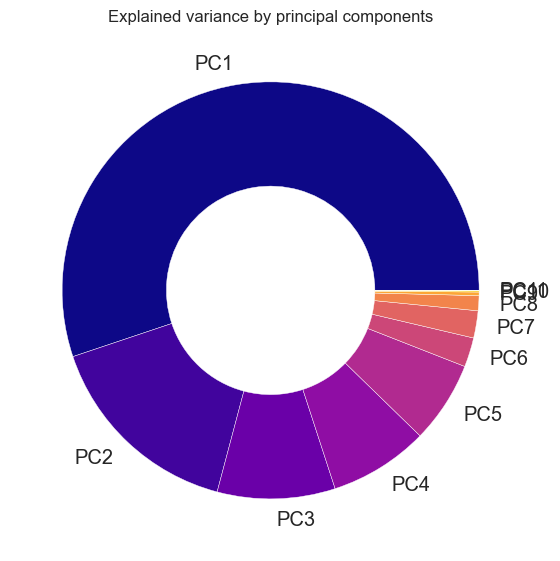

In [29]:
from psynlig import pca_explained_variance_pie
plt.style.use('seaborn-v0_8')

fig, axi = pca_explained_variance_pie(pca, cmap='plasma')
axi.set_title('Explained variance by principal components')

plt.show()

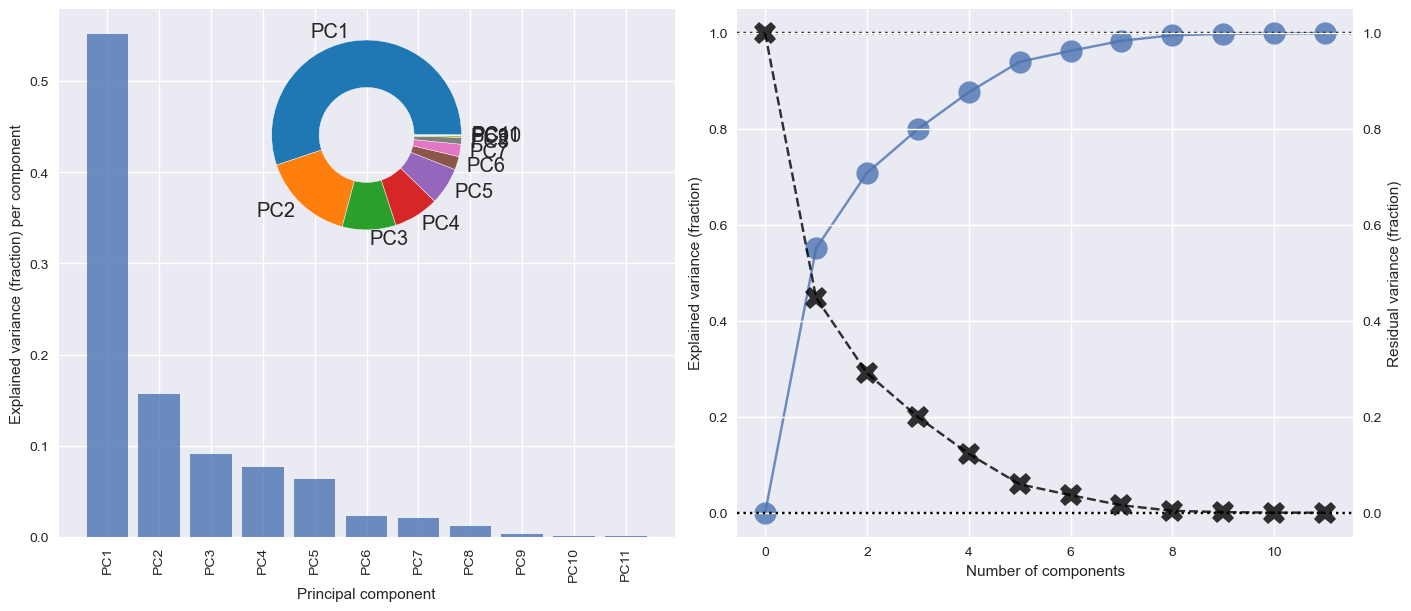

In [31]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from psynlig import (
    pca_explained_variance,
    pca_residual_variance,
    pca_explained_variance_bar,
    pca_explained_variance_pie,
    pca_1d_loadings,
    pca_2d_loadings,
    pca_2d_scores
)

fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2, figsize=(14, 6), constrained_layout=True
)
pca_explained_variance_bar(pca, axi=ax1, alpha=0.8)
pca_explained_variance(pca, axi=ax2, marker='o', markersize=16, alpha=0.8)
ax4 = ax2.twinx()
pca_residual_variance(
    pca,
    ax4,
    marker='X',
    markersize=16,
    alpha=0.8,
    color='black',
    linestyle='--'
)
ax3 = inset_axes(ax1, width='45%', height='45%', loc=9)
pca_explained_variance_pie(pca, axi=ax3, cmap='tab20')
plt.show()

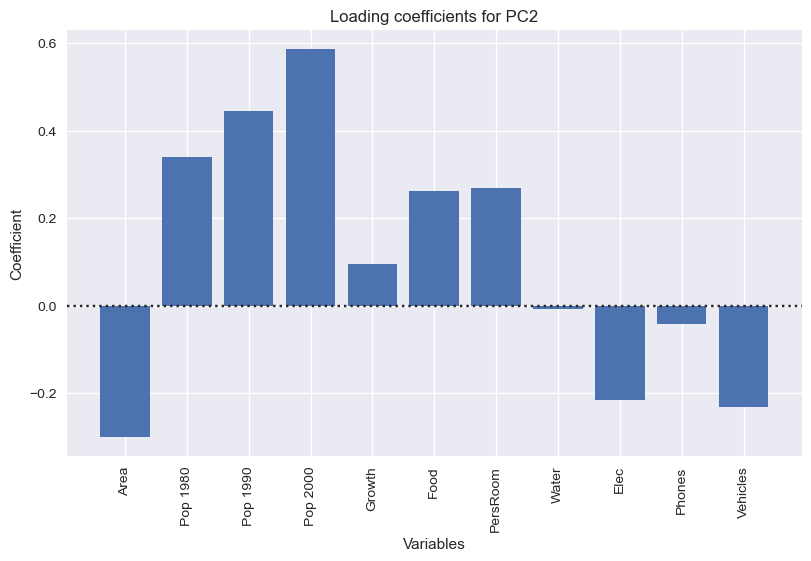

In [33]:
pca_1d_loadings(
        pca,
        cities.columns,
        select_components={2},
        plot_type='bar',
    )
plt.show()

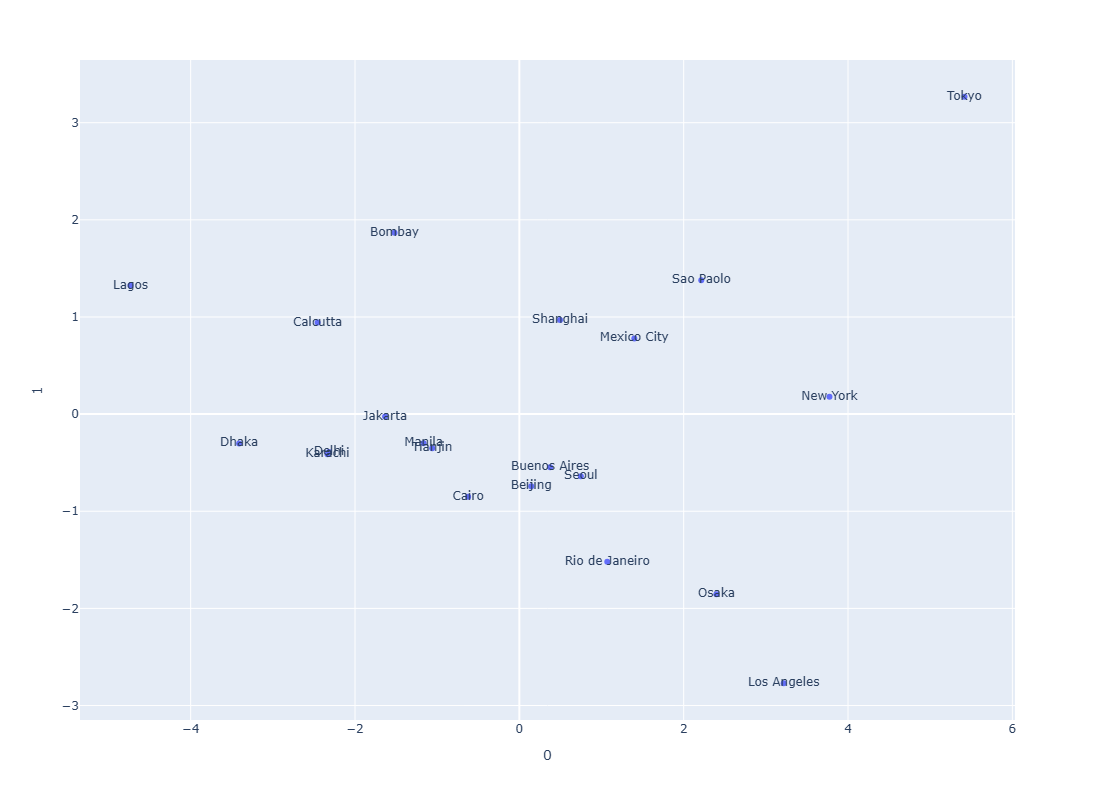

In [37]:
import plotly.express as px
fig = px.scatter(scores, x=0, y=1, text=cities.index, height=800)
fig.show()

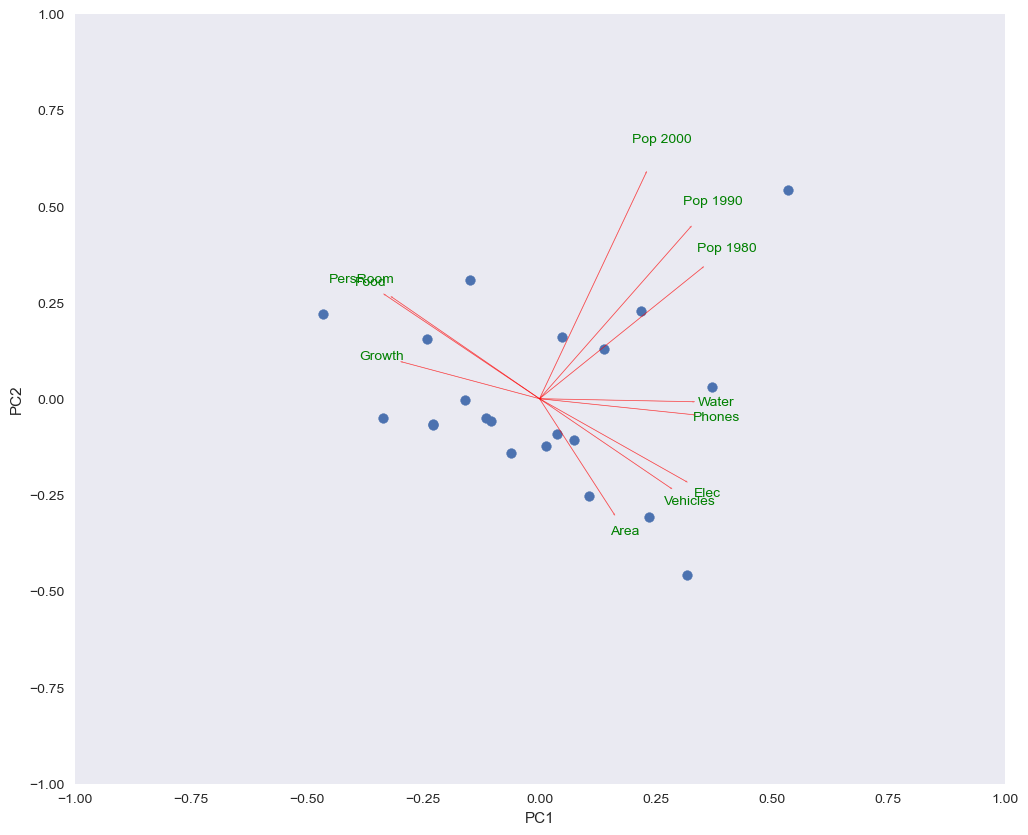

In [39]:
plt.rcParams["figure.figsize"] = (12,10)

def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley) #, c = cities.index.tolist())
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
biplot(scores[:,0:2],np.transpose(pca.components_[0:2, :]),cities.columns)
plt.show()

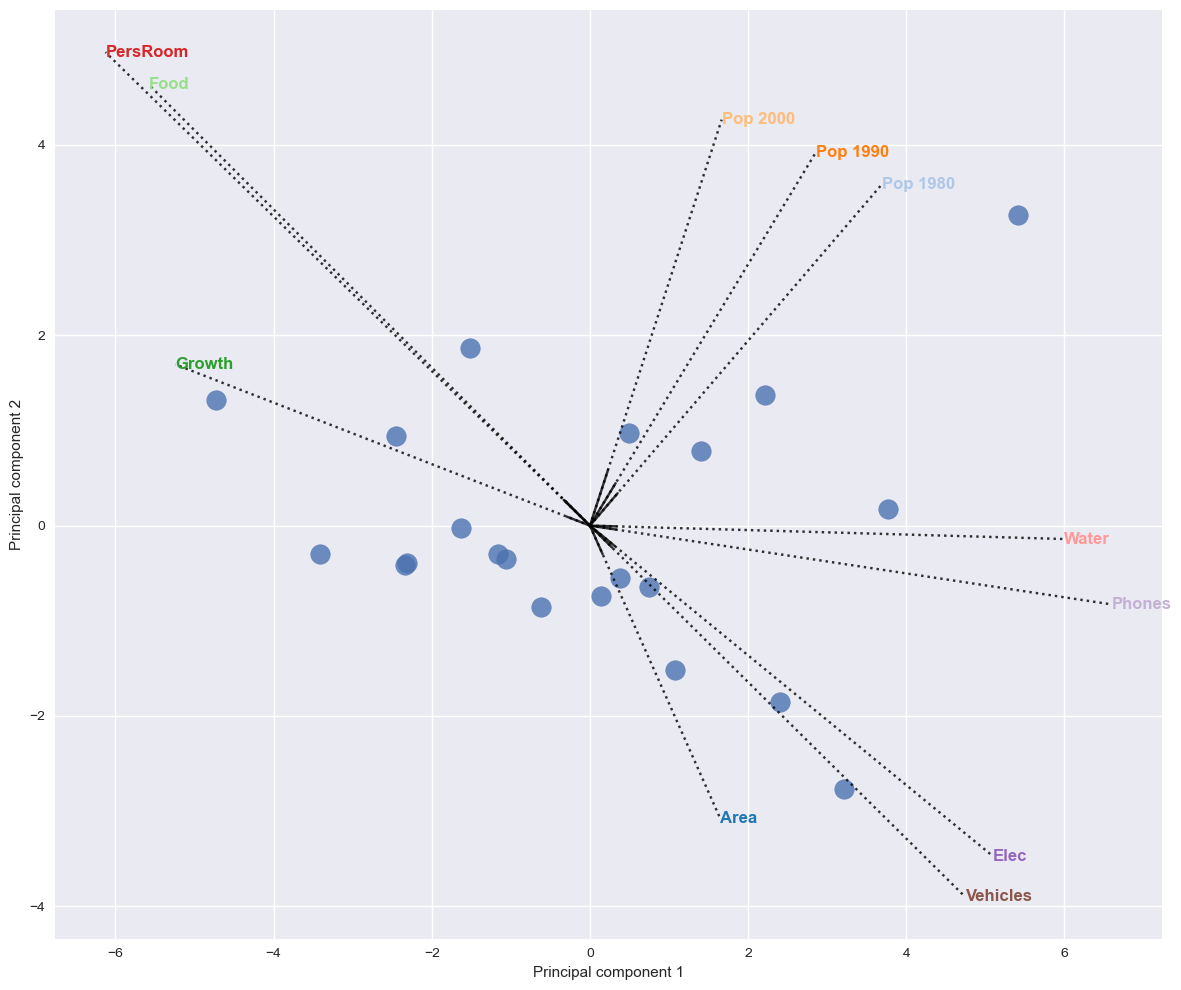

In [41]:
loading_settings = {
    'add_text': True
}
pca_2d_scores(
    pca,
    scores,
    xvars=cities.columns,
    #class_data=class_data,
    #class_names=class_names,
    select_components={(1, 2)},
    loading_settings=loading_settings,
    s=200,
    alpha=.8,
    cmap_class='Dark2',
)

plt.show()

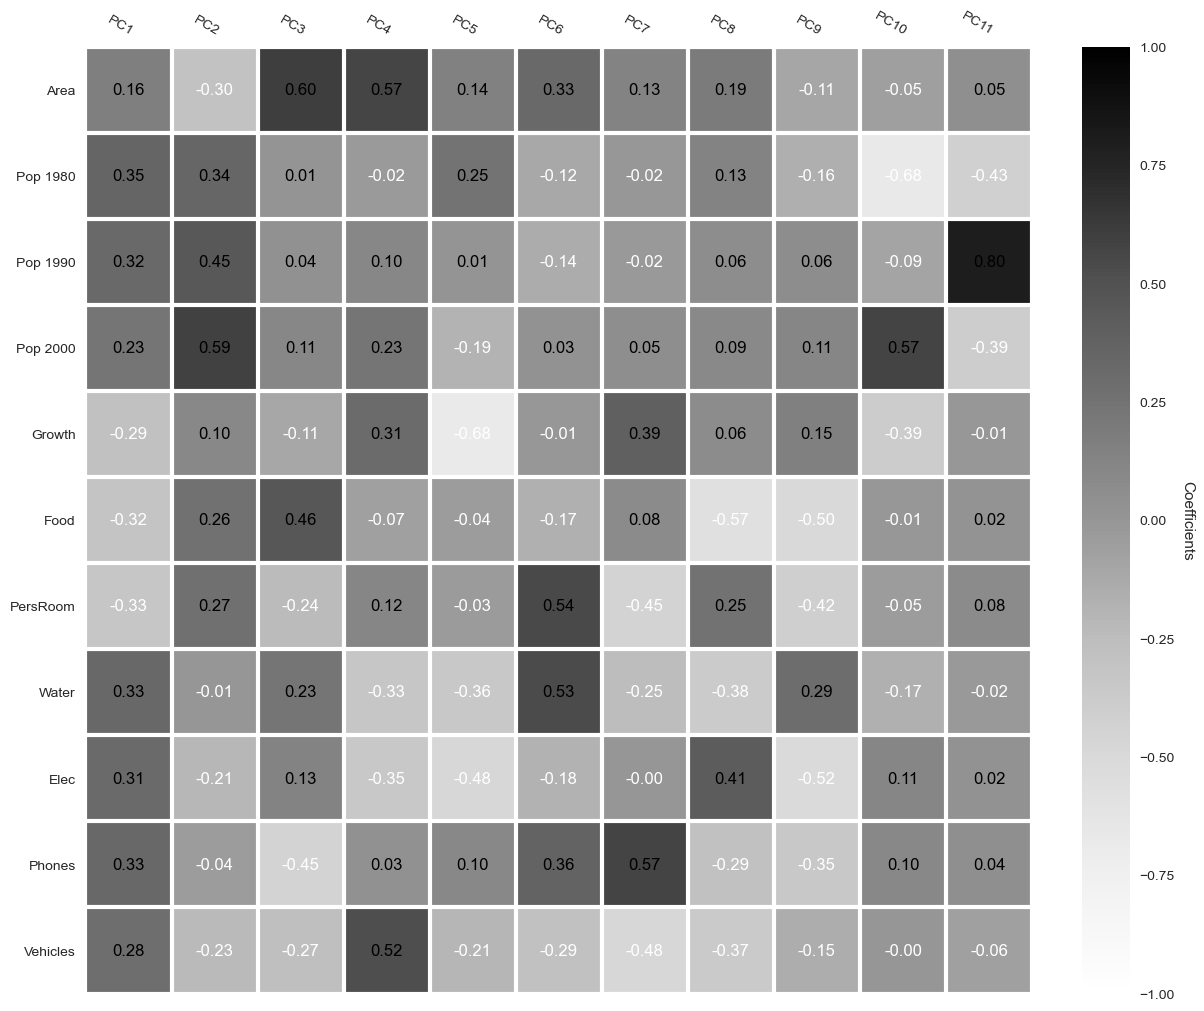

In [47]:
from psynlig import pca_loadings_map
kwargs = {
    'text': {
        'fontsize': 'large',
    },
    'heatmap': {
        'vmin': -1,
        'vmax': 1,
    },
}


# Plot the value of the coefficients:
pca_loadings_map(
    pca,
    cities.columns,
    textcolors=['white', 'black'],
    **kwargs
)
plt.show()

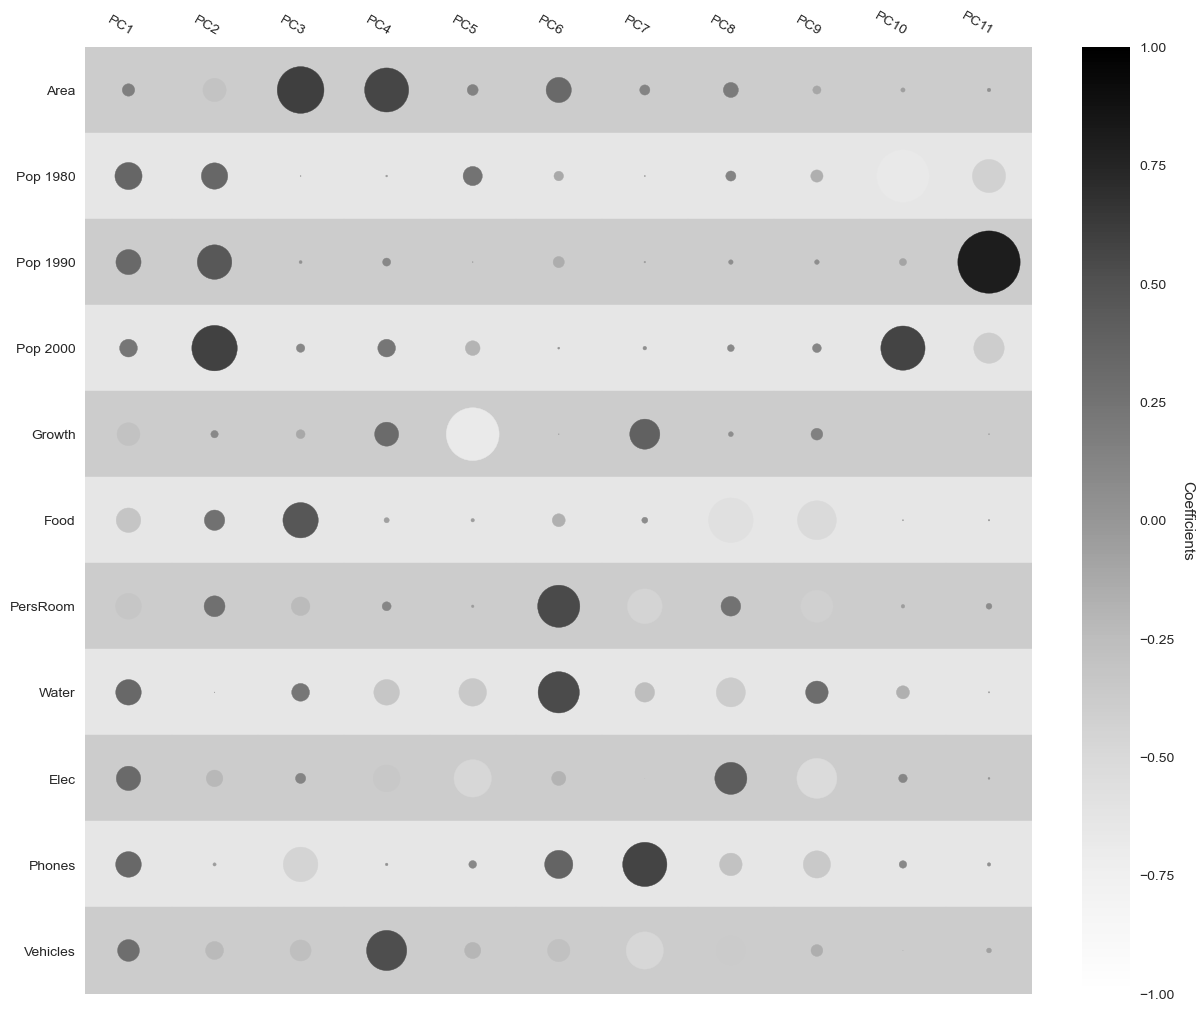

In [49]:
# Plot the value of the coefficients:
pca_loadings_map(
    pca,
    cities.columns,
    bubble=True,
    annotate=False,
    **kwargs
)
plt.show()

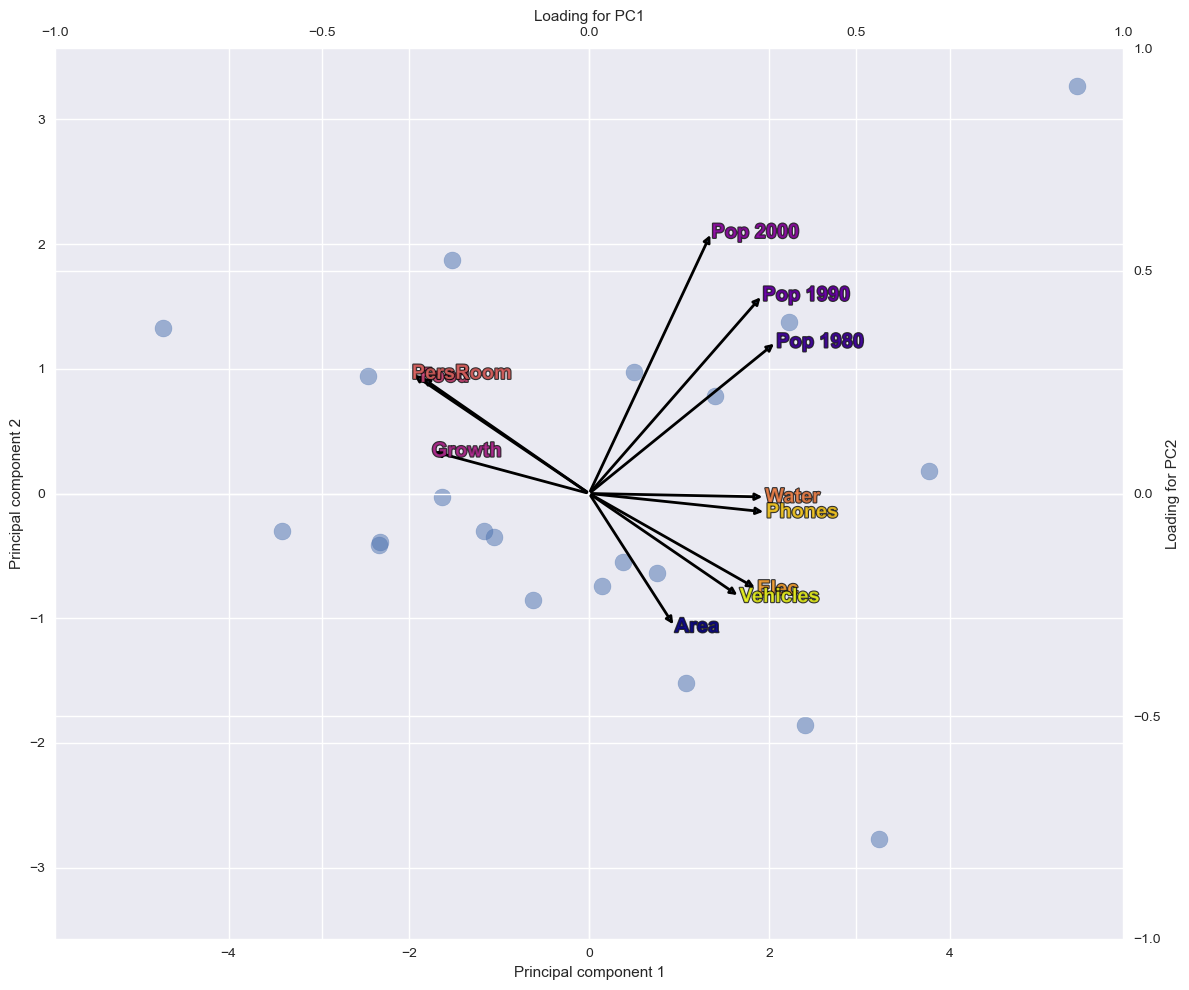

In [51]:
loading_settings = {
    'add_text': True,
    'add_legend': False,
    'biplot': True,
    'text': {
        'fontsize': 'x-large',
        'alpha': 0.8,
        'outline': {'linewidth': 1.5}
    },
}

pca_2d_scores(
    pca,
    scores,
    xvars=cities.columns,
    #class_data=class_data,
    #class_names=class_names,
    select_components={(1, 2)},
    loading_settings=loading_settings,
    s=150,
    alpha=.5,
    cmap_loadings='plasma',
)
plt.show()

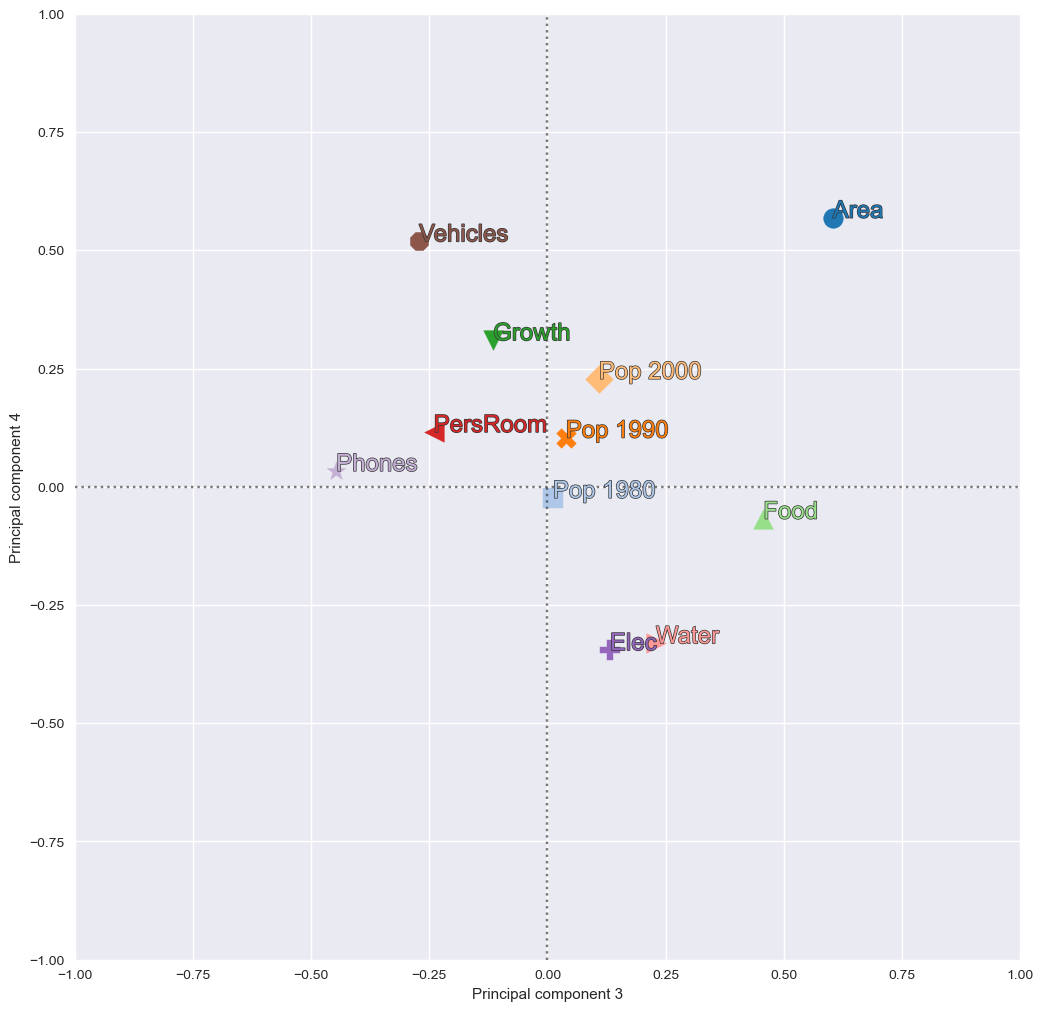

In [53]:
text_settings = {
    'fontsize': 'xx-large',
    'outline': {'foreground': '0.2'}
}

pca_2d_loadings(
    pca,
    cities.columns,
    select_components={(3, 4)},
    text_settings=text_settings
)
plt.show()

## PCA con el paquete *pca*



In [57]:
!pip install pca

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [70.0%] explained variance using the [11] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [70.00%] explained variance.
[pca] >The PCA reduction is performed on the [11] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 2 Principal Components explain [80.00%] of the variance.'}, xlabel='Principal Component', ylabel='Percentage explained variance'>)

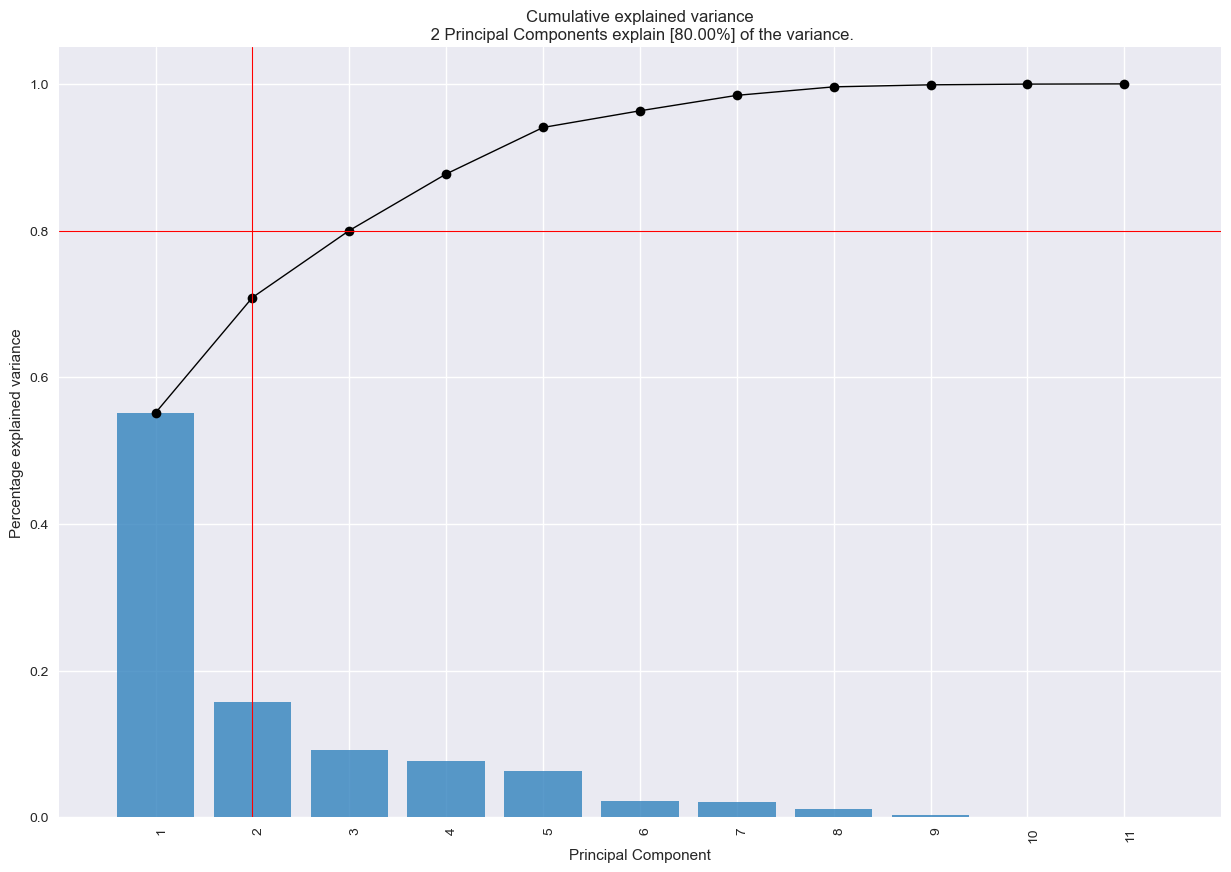

In [59]:
# Load library
from pca import pca

# Initialize pca with default parameters
model = pca(normalize=True,n_components=0.7)

# Fit transform
results = model.fit_transform(cities)

# Plot the explained variance
model.plot()

In [61]:
model.results

{'loadings':          Area  Pop 1980  Pop 1990  Pop 2000    Growth      Food  PersRoom  \
 PC1  0.160155  0.350227  0.324320   0.22897 -0.294844 -0.316499 -0.332189   
 PC2 -0.299178  0.340310  0.445359   0.58641  0.095274  0.263001  0.269795   
 
         Water      Elec    Phones  Vehicles  
 PC1  0.329585  0.314552  0.331179  0.281742  
 PC2 -0.007733 -0.214427 -0.041567 -0.231643  ,
 'PC':                      PC1       PC2
 Buenos Aires    0.374405 -0.547295
 Dhaka          -3.410661 -0.301877
 Rio de Janeiro  1.069987 -1.520236
 Sao Paolo       2.213816  1.377854
 Beijing         0.144974 -0.743459
 Shanghai        0.495090  0.970056
 Tianjin        -1.060796 -0.352499
 Cairo          -0.623249 -0.850112
 Bombay         -1.518988  1.868306
 Calcutta       -2.454763  0.942389
 Delhi          -2.317224 -0.389336
 Jakarta        -1.634029 -0.025633
 Osaka           2.397831 -1.854149
 Tokyo           5.417498  3.267173
 Seoul           0.748206 -0.640512
 Mexico City     1.398946  0

In [63]:
model.results['loadings']

,Area,Pop 1980,Pop 1990,Pop 2000,Growth,Food,PersRoom,Water,Elec,Phones,Vehicles
PC1,0.160155,0.350227,0.324320,0.22897,-0.294844,-0.316499,-0.332189,0.329585,0.314552,0.331179,0.281742
PC2,-0.299178,0.340310,0.445359,0.58641,0.095274,0.263001,0.269795,-0.007733,-0.214427,-0.041567,-0.231643


[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [80.00%] of the variance'}, xlabel='PC1 (55.1% expl.var)', ylabel='PC2 (15.7% expl.var)'>)

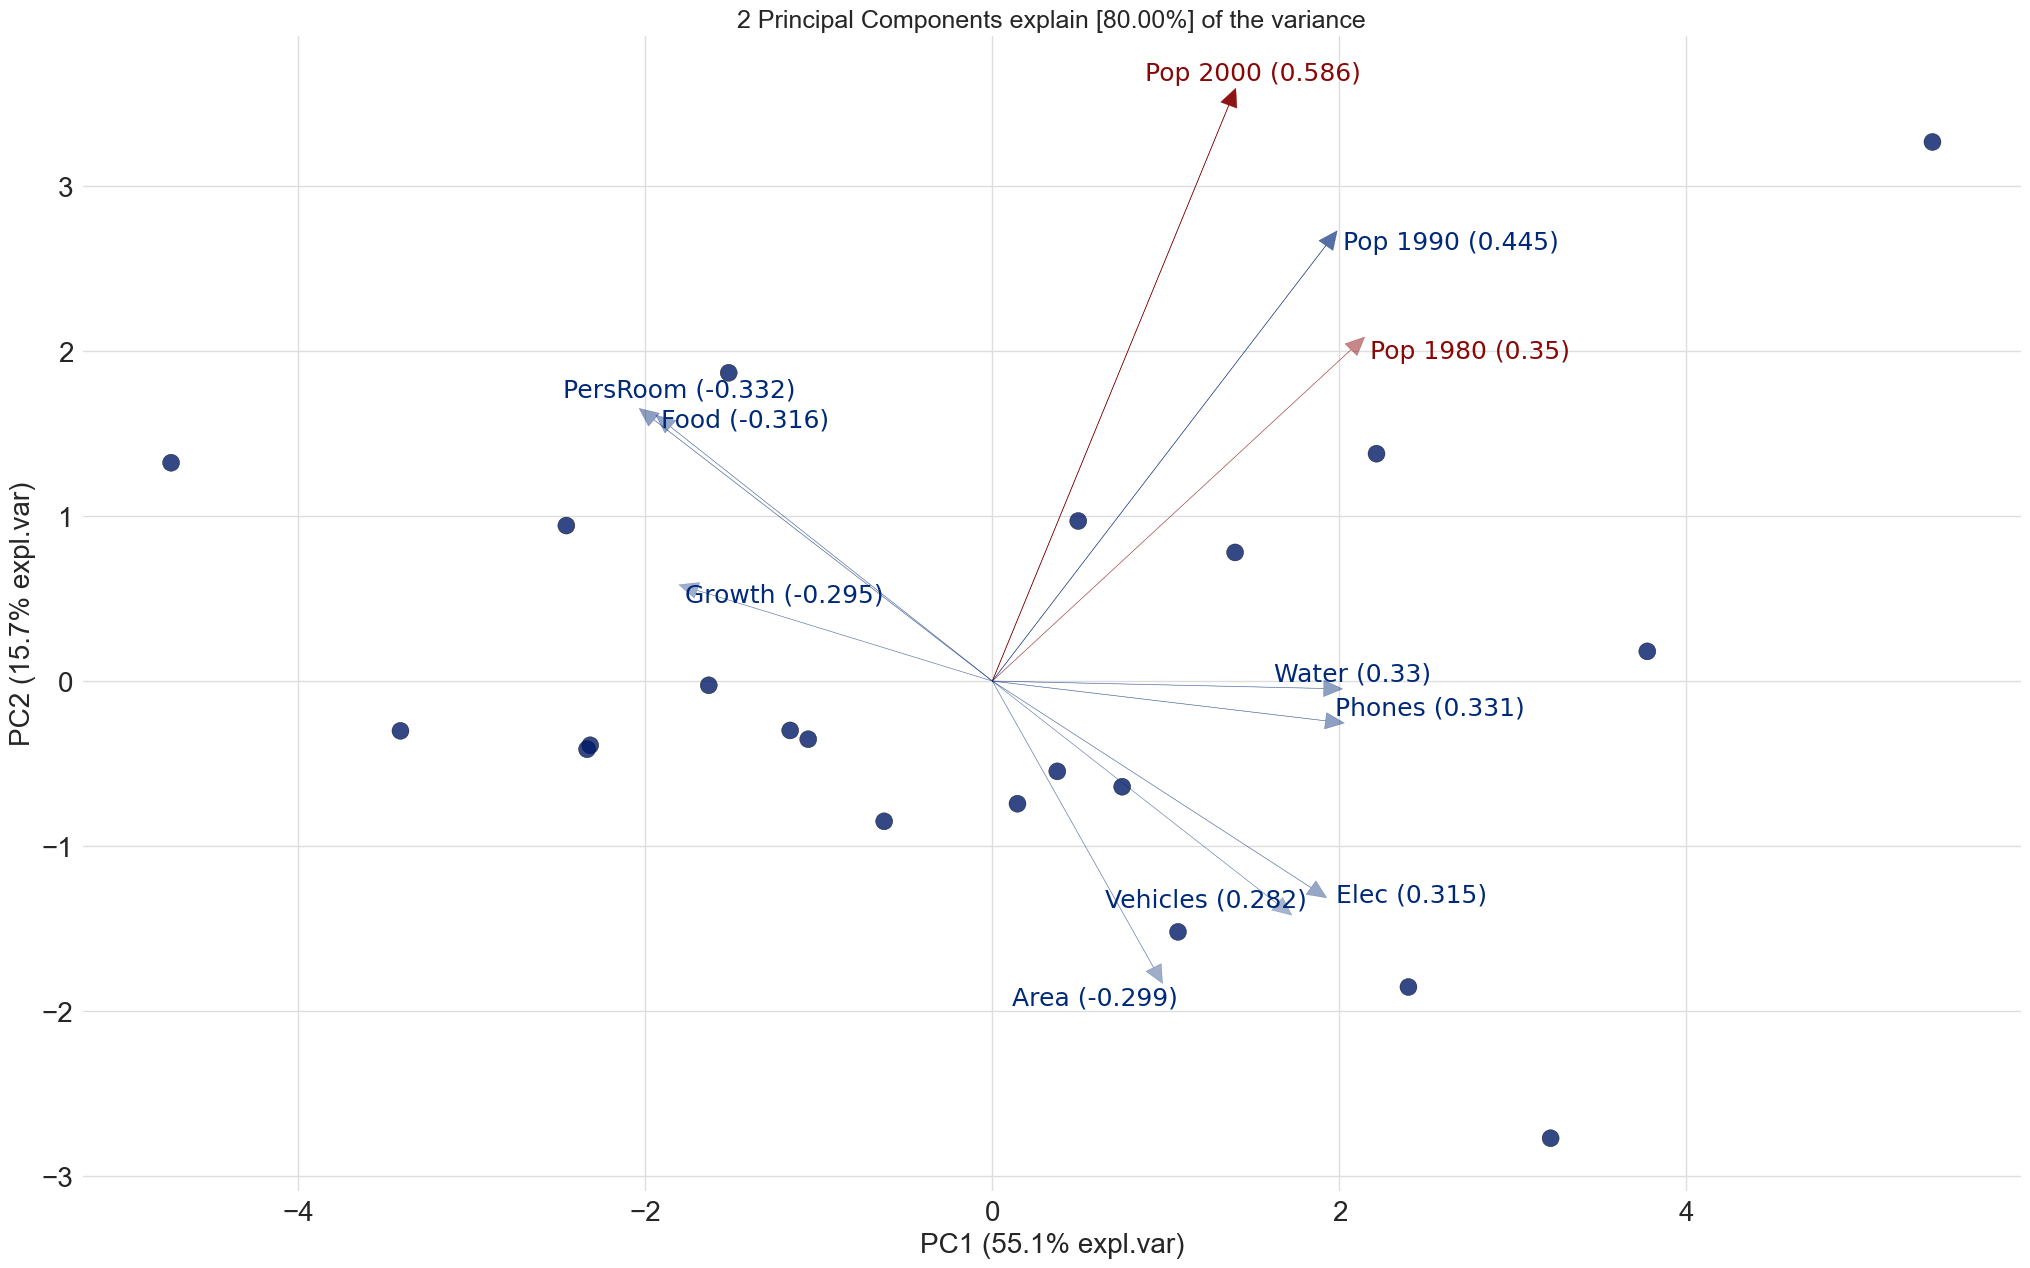

In [65]:
# Plot the explained variance
model.biplot(legend=False)
#plt.show()

# Análisis Factorial

Para el Análisis Factorial vamos a explorar el paquete **factor_analyzer** que implementa el análisis exploratorio con la estimación de parámetros por MINRES (minimización de residuos, por defecto) o ML (máxima verosimilitud). Está inspirado en la implementación de esta técnica en el paquete *psych* de R. 

https://factor-analyzer.readthedocs.io/en/latest/index.html


In [69]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(rotation ='promax', method='minres',n_factors=2) #cities.shape[1]

fa.fit(X)

FactorAnalyzer(n_factors=2, rotation_kwargs={})

**Secree plot**



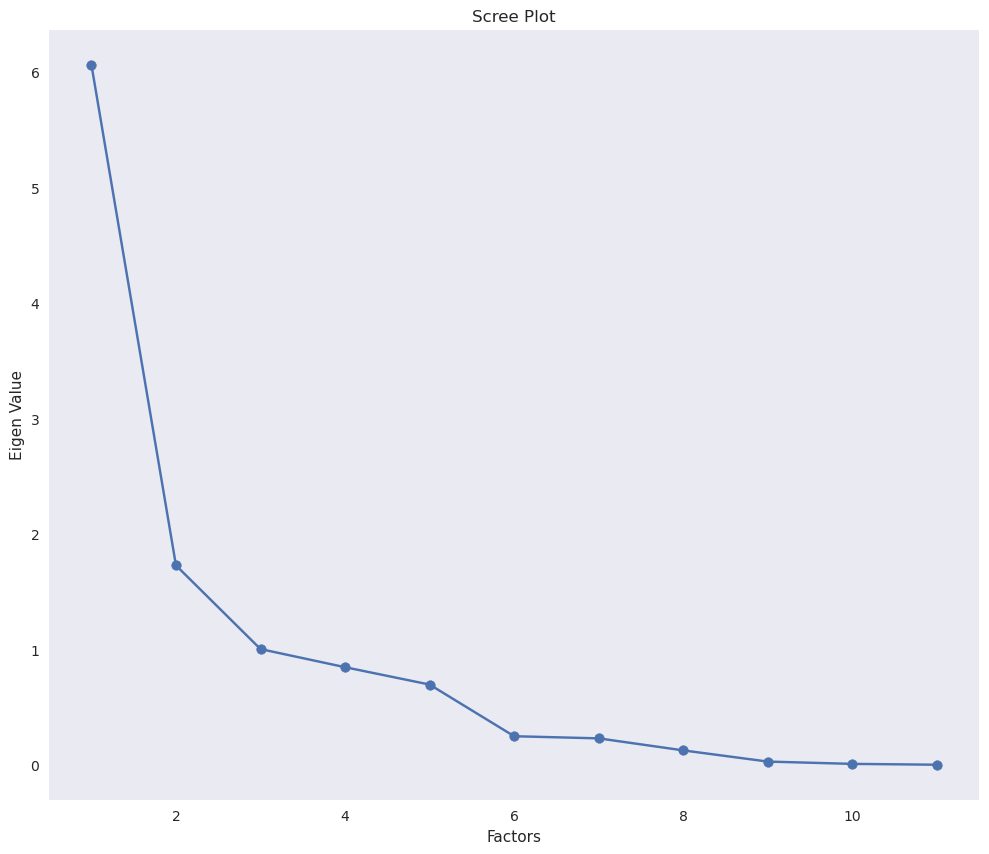

In [71]:
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,X.shape[1]+1),ev)
plt.plot(range(1,X.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

In [73]:
plt.show()

**Varianza de los factores**



In [75]:
fa_var = pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])
fa_var

,0,1
Variance,4.293450,2.889408
Proportional Var,0.390314,0.262673
Cumulative Var,0.390314,0.652987


**Comunalidades**



In [77]:
X

array([[ 0.61819185,  0.1855182 , -0.03315823, -0.41967567, -0.81199815,
        -0.07896303, -0.56883092, -0.13417456,  0.11171377,  0.02374128,
        -0.47871151],
       [-0.65799679, -1.41455043, -1.2188549 , -0.73915835,  2.4628817 ,
         1.44660273,  0.24227989, -1.30820197, -0.3736633 , -0.72410894,
        -0.68259412],
       [ 0.5118428 , -0.08703422, -0.154893  , -0.58051363, -0.36029053,
        -1.00756828, -0.93751755,  0.21803366,  0.67798703, -0.35018383,
         1.05040805],
       [ 0.83088996,  0.71251727,  1.59102707,  1.95146577,  0.71251489,
         0.58432643, -0.93751755,  1.03985285,  0.83977939,  0.14838298,
         1.05040805],
       [ 2.7026333 , -0.02909571, -0.17461404, -0.04341232, -0.52968092,
         0.71698432, -0.64256818,  0.3354364 ,  0.03081759, -0.72410894,
        -0.83142842],
       [ 0.46930318,  0.62512668,  0.45353738,  0.69766076, -0.81199815,
         0.91597116, -0.05266953,  0.746346  ,  0.43529849, -0.59946723,
        -0.912

In [79]:
fa_commu = pd.DataFrame(fa.get_communalities(),index=cities.columns,columns=['Communalities'])
fa_commu

,Communalities
Area,0.229141
Pop 1980,0.721757
Pop 1990,0.960683
Pop 2000,1.198478
Growth,0.396337
Food,0.775233
PersRoom,0.841085
Water,0.438970
Elec,0.648510
Phones,0.479314


**Cargas**



In [81]:
fa_loadings = pd.DataFrame(fa.loadings_,index=cities.columns)
fa_loadings

,0,1
Area,0.465313,-0.112361
Pop 1980,0.251303,0.811544
Pop 1990,0.050534,0.978841
Pop 2000,-0.282765,1.057602
Growth,-0.615771,-0.131011
Food,-0.876563,0.082883
PersRoom,-0.914616,0.067548
Water,0.608606,0.261856
Elec,0.805201,-0.012684
Phones,0.659737,0.209907


**Puntuaciones**



In [83]:
fa_scores = pd.DataFrame(fa.transform(X),index=cities.index)
fa_scores.head()

,0,1
City,,
Buenos Aires,0.278219,0.574246
Dhaka,-0.690961,-1.367438
Rio de Janeiro,1.219713,-0.020360
Sao Paolo,0.187089,2.014961
Beijing,0.094224,-0.013755


**Visualización de resultados** 




Con la función biplot que hemos definido antes.



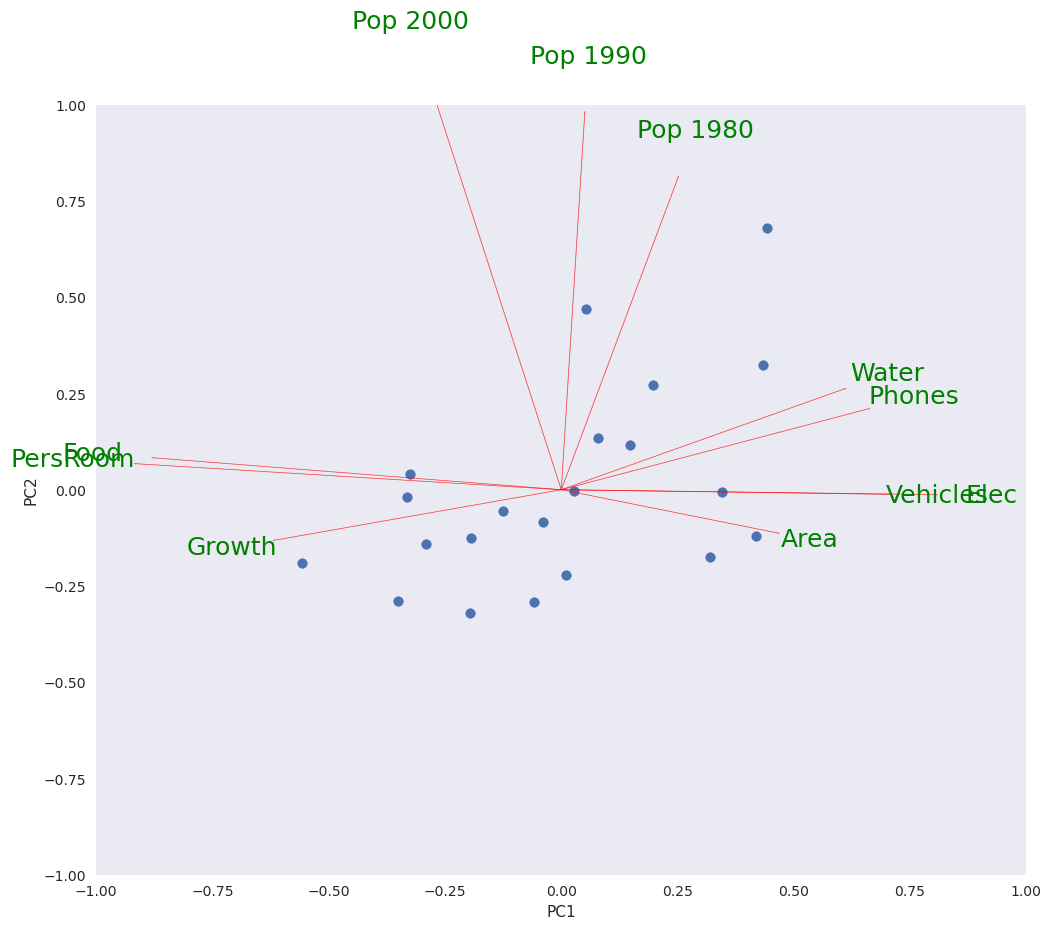

In [85]:
biplot(np.array(fa_scores),np.array(fa_loadings),cities.columns)
plt.show()

Se puede apreciar la rotación para alienar las direcciones de los factores con las observadas en las variables. De esta forma, la proyección sobre el espacio de 2 factores es más clara y permite recoger de forma más clara los efectos de los grupos de variables. 

Aquí, podríamos decir que el factor 1 está asociado con el desarrollo tecnológico en contraposición al hacinamiento, el índice de alimentos y en menor medida el crecimiento y el factor 2 recoge las variables de poblaciones, en especial Pob.2000 que está casi perfectamente alienada, por lo que la contribución es alta y además tiene un módulo (longitud) grande, por lo que su carga es alta. 

A la luz de la solución factorial y especialmente de la baja comunalidad de Area (algo que ya intuímos en un inicio por su bajo MSA), vamos a probar un estudio de FA eliminando esta variable del archivo. 


In [89]:
cities_r = cities.drop(['Area'],axis=1)

fa.fit(cities_r)

FactorAnalyzer(n_factors=2, rotation_kwargs={})

**Varianza de los factores**



In [93]:
fa_var = pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])
fa_var

,0,1
Variance,4.366304,2.778616
Proportional Var,0.436630,0.277862
Cumulative Var,0.436630,0.714492


Se aumenta la variabilidad explicada. 

**Comunalidades**


In [95]:
fa_commu = pd.DataFrame(fa.get_communalities(),index=cities_r.columns,columns=['Communalities'])
fa_commu

,Communalities
Pop 1980,0.681314
Pop 1990,0.917311
Pop 2000,1.231536
Growth,0.407257
Food,0.931513
PersRoom,0.787584
Water,0.447220
Elec,0.693992
Phones,0.553167
Vehicles,0.494025


Crecimiento y vehículos son las peor representadas en la solución.

**Cargas**


In [97]:
fa_loadings = pd.DataFrame(fa.loadings_,index=cities_r.columns)
fa_loadings

,0,1
Pop 1980,0.297132,0.770082
Pop 1990,0.088457,0.953670
Pop 2000,-0.273799,1.075440
Growth,-0.630622,-0.097842
Food,-0.949556,0.172791
PersRoom,-0.884162,0.076428
Water,0.628724,0.227872
Elec,0.830986,-0.058775
Phones,0.731977,0.131821
Vehicles,0.701799,-0.038780


**Puntuaciones**



In [99]:
fa_scores = pd.DataFrame(fa.transform(X_r),index=cities_r.index)
fa_scores.head()

,0,1
City,,
Buenos Aires,0.262787,0.203463
Dhaka,-0.778606,-1.358196
Rio de Janeiro,1.185529,0.005021
Sao Paolo,0.159247,1.987205
Beijing,-0.241262,-0.444124


Biplot.



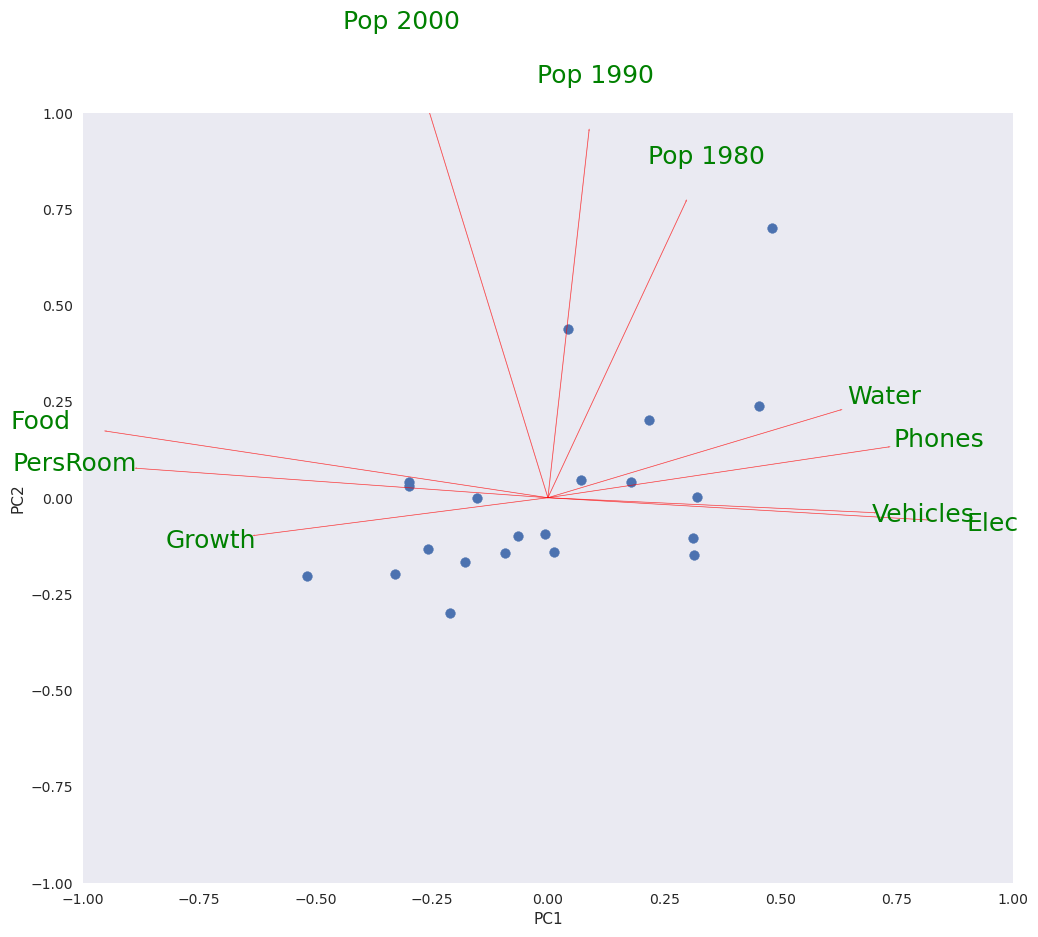

In [101]:
biplot(np.array(fa_scores),np.array(fa_loadings),cities_r.columns)
plt.show()

# Comparativa PCA-FA-FA_varimax

Exploramos aquí un proceso de comparación de resultados que puede ser de utilidad de cara a la exploración rápida de modelos de reducción de dimensiones y que ilustra las diferencias en las soluciones de PCA, FA y FA con rotación de factores. 

En esta ocasión, vamos a ajustar el FA mediante la función **FactorAnalysis** implementada en *sklearn*, que calcula las cargas mediante el método de máxima verosimilitud (ML).

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html


Vamos a ajustar los 3 métodos a los datos escalados y generar un gráfico de las cargas de las variables en los factores o componentes del espacio reducido. 




 PCA :

          0         1
0  0.358797  0.329726
1  0.333032  0.446924
2  0.236535  0.611141
3 -0.296535  0.107591
4 -0.321067  0.330116
5 -0.328905  0.259426
6  0.333172 -0.019178
7  0.317373 -0.245651
8  0.339349 -0.108871
9  0.279863 -0.240055


 Unrotated FA :

          0         1
0  0.945228  0.286123
1  0.998130  0.042417
2  0.939094 -0.331475
3 -0.458575 -0.772274
4 -0.379803 -0.655352
5 -0.432549 -0.658420
6  0.588479  0.337758
7  0.413298  0.484332
8  0.567006  0.507531
9  0.398535  0.384730


 Varimax FA :

          0         1
0  0.823824  0.544643
1  0.944253  0.326267
2  0.994678 -0.048884
3 -0.218406 -0.871205
4 -0.176385 -0.736631
5 -0.226048 -0.754664
6  0.467217  0.492032
7  0.257419  0.582347
8  0.398061  0.648561
9  0.271775  0.482686


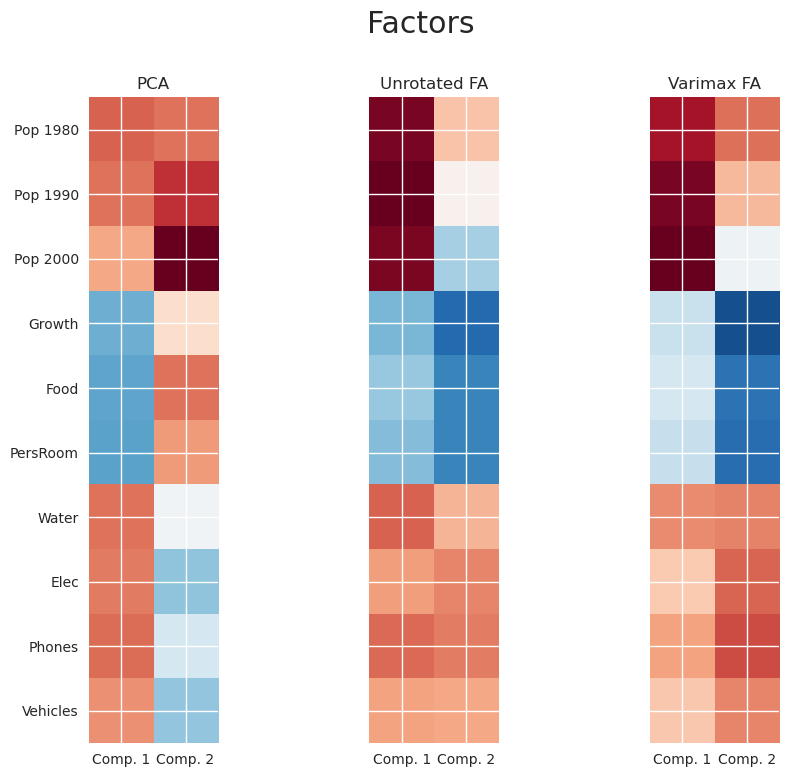

In [103]:
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import scale
n_comps = 2

# Escalado de datos
# ==============================================================================
X=scale(cities_r)

feature_names=cities_r.columns
methods = [
    ("PCA", PCA()),
    ("Unrotated FA", FactorAnalysis()),
    ("Varimax FA", FactorAnalysis(rotation="varimax")),
]
fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 8))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(X)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(pd.DataFrame(components))

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    if ax.get_subplotspec().is_first_col():
        ax.set_yticklabels(feature_names)
    else:
        ax.set_yticklabels([])
    ax.set_title(str(method))
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Comp. 1", "Comp. 2"])
    
fig.suptitle("Factors")
plt.tight_layout()
plt.show()